# Load dataset

In [ ]:
! pip install datasets
! pip install huggingface_hub

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.4 MB/s eta 0:00:00


In [ ]:
! huggingface-cli login --token YOUR_HF_TOKEN

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
from datasets import load_dataset
dataset = load_dataset("esg-x/esg-dataset", token=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/713 [00:00<?, ?B/s]

mixed-00000-of-00002.parquet:   0%|          | 0.00/165M [00:00<?, ?B/s]

mixed-00001-of-00002.parquet:   0%|          | 0.00/89.2M [00:00<?, ?B/s]

sasb-00000-of-00011.parquet:   0%|          | 0.00/93.5M [00:00<?, ?B/s]

sasb-00001-of-00011.parquet:   0%|          | 0.00/79.7M [00:00<?, ?B/s]

sasb-00002-of-00011.parquet:   0%|          | 0.00/116M [00:00<?, ?B/s]

sasb-00003-of-00011.parquet:   0%|          | 0.00/87.7M [00:00<?, ?B/s]

sasb-00004-of-00011.parquet:   0%|          | 0.00/117M [00:00<?, ?B/s]

sasb-00005-of-00011.parquet:   0%|          | 0.00/114M [00:00<?, ?B/s]

sasb-00006-of-00011.parquet:   0%|          | 0.00/106M [00:00<?, ?B/s]

sasb-00007-of-00011.parquet:   0%|          | 0.00/96.3M [00:00<?, ?B/s]

sasb-00008-of-00011.parquet:   0%|          | 0.00/109M [00:00<?, ?B/s]

sasb-00009-of-00011.parquet:   0%|          | 0.00/103M [00:00<?, ?B/s]

sasb-00010-of-00011.parquet:   0%|          | 0.00/109M [00:00<?, ?B/s]

google-00000-of-00006.parquet:   0%|          | 0.00/235M [00:00<?, ?B/s]

google-00001-of-00006.parquet:   0%|          | 0.00/180M [00:00<?, ?B/s]

google-00002-of-00006.parquet:   0%|          | 0.00/168M [00:00<?, ?B/s]

google-00003-of-00006.parquet:   0%|          | 0.00/163M [00:00<?, ?B/s]

google-00004-of-00006.parquet:   0%|          | 0.00/184M [00:00<?, ?B/s]

google-00005-of-00006.parquet:   0%|          | 0.00/195M [00:00<?, ?B/s]

Generating mixed split:   0%|          | 0/4438 [00:00<?, ? examples/s]

Generating sasb split:   0%|          | 0/2074 [00:00<?, ? examples/s]

Generating google split:   0%|          | 0/11112 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    mixed: Dataset({
        features: ['id', 'company', 'content', 'datatype', 'dataset', 'content_type', 'report_id'],
        num_rows: 4438
    })
    sasb: Dataset({
        features: ['id', 'company', 'content', 'datatype', 'dataset', 'content_type', 'report_id'],
        num_rows: 2074
    })
    google: Dataset({
        features: ['id', 'company', 'content', 'datatype', 'dataset', 'content_type', 'report_id'],
        num_rows: 11112
    })
})

In [ ]:
import pandas as pd
# Convert each split to a pandas DataFrame
df_mixed = pd.DataFrame(dataset['mixed'])
df_sasb = pd.DataFrame(dataset['sasb'])
df_google = pd.DataFrame(dataset['google'])

# Concatenate the DataFrames into one large DataFrame
df = pd.concat([df_mixed, df_sasb, df_google], ignore_index=True)

<ipython-input-5-e3dc64e36d1b>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_mixed, df_sasb, df_google], ignore_index=True)


In [ ]:
df.drop(columns=["id", "company", "report_id"], inplace=True)

# Unstructured content type handling


In [ ]:
import json

In [ ]:
# Function to process 'unstructured'
def process_unstructured(content):
    try:
        parsed = json.loads(content)
        return " ".join([k.get("content", k.get("text")) for k in parsed.values()])
    except json.JSONDecodeError:
        return content

# Function to process 'list_dump'
def process_list_dump(content):
    try:
        parsed = json.loads(content)
        return ' '.join(parsed)
    except json.JSONDecodeError:
        return content

# Function to process 'plain_text'
def process_plain_text(content):
    return content

#Apply functions conditionally based on 'content_type'
def process_content(row):
    if row['content_type'] == 'unstructured':
        return process_unstructured(row['content'])
    elif row['content_type'] == 'list_dump':
        return process_list_dump(row['content'])
    elif row['content_type'] == 'plain_text':
        return process_plain_text(row['content'])
    else:
        return row['content']  # Default case if needed

In [ ]:
df['content_processed'] = df.apply(process_content, axis=1)

# Detect the language

In [ ]:
! pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 42.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=c5bd77a1b70b894ae85ebd88c5c3068a41bea7da16e46a783cb145c08698b2b9
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
DetectorFactory.seed = 0

In [ ]:
import pandas as pd
def find_laguages(texts):
    languages = []
    for text in texts:
        try:
            if text and len(text) > 2:  # Check if text is not empty and has more than 2 characters
                lang = detect(text)
            else:
                lang = 'unknown'  # Assign 'unknown' for empty or too short texts
        except LangDetectException:
            lang = 'unknown'  # Handle detection exceptions
        languages.append(lang)

    # Count the occurrences of each language
    language_counts = pd.Series(languages).value_counts()
    return languages, language_counts

In [ ]:
languages, language_counts = find_laguages(df["content_processed"])

In [ ]:
df["language"] = languages

In [ ]:
df["language"].value_counts()

,count
language,
en,17082
it,181
es,102
pt,67
unknown,58
ko,43
fr,21
ja,20
de,12


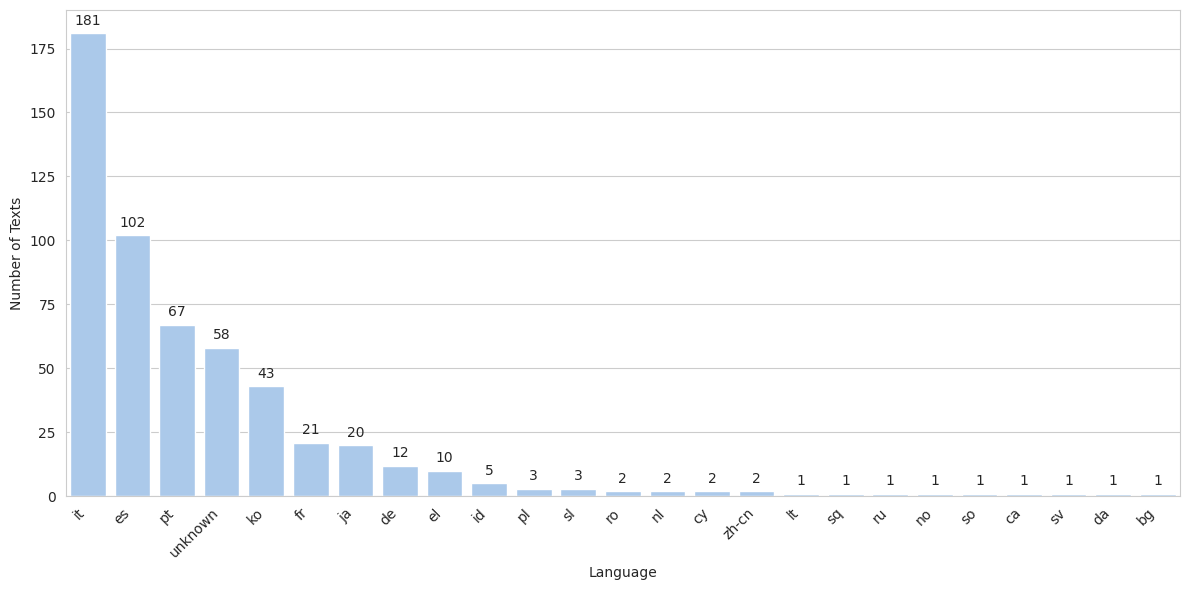

In [ ]:
# prompt: df["language"].value_counts() create a graph, exclude "en", order from biggest to smallest, add number of texts for each language above the bar, !!add seaborn format and saving the figure

import matplotlib.pyplot as plt
import seaborn as sns

# Exclude 'en' and order from biggest to smallest
language_counts_filtered = df["language"].value_counts()
language_counts_filtered = language_counts_filtered[language_counts_filtered.index != 'en']
language_counts_filtered = language_counts_filtered.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=language_counts_filtered.index, y=language_counts_filtered.values)
sns.set_palette("pastel")
# Add the number of texts above each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')


plt.xlabel("Language")
plt.ylabel("Number of Texts")
#plt.title("Distribution of Languages (excluding English)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Save the figure in seaborn format
plt.savefig("language_distribution_seaborn.png")

plt.show()


In [ ]:
df['text_length'] = df['content_processed'].apply(len)

# Filter out non english data. short documents, keep only documents related to esg and sustainability

## Language

In [ ]:
filtered_df = df[df['language'] == 'en']

In [ ]:
len(filtered_df)

17082

## Datatype only esg reports

In [ ]:
filtered_df["datatype"].value_counts()

,count
datatype,
Sustainability Report,2632
sustainability_report,2541
sustainability report,2172
esg-sustainability report,1616
other document,1063
annual report,977
Other,767
esg report,659
Annual Report,544


In [ ]:
datatypes_of_interest = ["Sustainability Report", "sustainability_report", "sustainability report", "esg-sustainability report", "esg report", "ESG Report", "ESG report", "SASB Index", "CSR Report", "ESG Index", "SASB Report", "Impact Report", "ESG-Sustainability Report", "ESG Data Book", "Corporate Responsibility Reports", "impact report", "Annual and Sustainability Report", "Global Impact Report", "Environmental, Social and Governance Report", "TCFD report", "Corporate Responsibility Report", "ESG Annual Report", "ESG Impact Report", "sustainable development report", "ESG Data Sheet", "social impact report", "SASB Disclosure", "CSR report", "Corporate Sustainability Report", "climate report", "Sustainability report", "Corporate Social Responsibility Report", "environmental, social and governance report","Corporate Governance Report", "Environmental Progress Report", "ESG and Sustainability Report", "ESG FactBook", "ESG Highlights", "ESG Factsheet", "TCFD Report", "ESG Supplement", "Responsible Business Report", "more_esg-sustainability report", "Environmental, Social and Governance (ESG) Report", "ESG/Sustainability Report", "ESG-sustainability report", "environmental social and governance report", "ESG Quarterly Report", "environmental-social-governance review", "environmental social governance impact report", "ESG Brochure", "ESG-Climate Report", "esg engagement report"]

In [ ]:
filtered_df = filtered_df[filtered_df['datatype'].isin(datatypes_of_interest)]

In [ ]:
len(filtered_df)

11140

## Length

In [ ]:
filtered_df['text_length'].describe()

,text_length
count,1.114000e+04
mean,1.419056e+05
std,1.468373e+05
min,2.300000e+01
25%,5.553100e+04
50%,9.771300e+04
75%,1.743765e+05
max,1.845848e+06


In [ ]:
# the report should be over one paragraph, so filter out the smaller than an average paragraph reports
filtered_df[filtered_df['text_length'] <= 200]["content_processed"]

,content_processed
5969,Topic Accounting metric Code Reference Topic Accounting metric Code Reference Topic Accounting metric Code Reference Topic Accounting metric Code Reference Topic Accounting metric Code Reference
6748,Your support ID is: 1244223963987258741.
6981,We will be back shortly
7019,An error (502 Bad Gateway) has occurred in response to this request.
7725,"404 Sorry, this page does not exist. Click return"
8401,Your support ID is: 8953746789597981915.


In [ ]:
filtered_df = filtered_df[filtered_df['text_length'] > 200]

In [ ]:
len(filtered_df)

11134

In [ ]:
filtered_df['unique_id'] = filtered_df.index

In [ ]:
filtered_df.columns

Index(['content', 'datatype', 'dataset', 'content_type', 'content_processed',
       'language', 'text_length', 'unique_id'],
      dtype='object')

In [ ]:
# need only unique id, content, content_type, dataset, datatype
filtered_df.drop(columns=['content_processed','language', 'text_length'], inplace=True)

In [ ]:
filtered_df.head()

,content,datatype,dataset,content_type,unique_id
0,Sustainability Highlight Report CARE BEYOND SK...,sustainability_report,kaggle_reports,plain_text,0
1,Corporate Responsibility Report 2021 2 Content...,sustainability_report,kaggle_reports,plain_text,1
2,VONOVIA SE SUSTAINABILITY REPORT 2021 =For a S...,sustainability_report,kaggle_reports,plain_text,2
3,Sustainability Report 2021 TABLE OF CONTENTS S...,sustainability_report,kaggle_reports,plain_text,3
4,Our ideas and concepts FOR A SUSTAINABLE FUTUR...,sustainability_report,kaggle_reports,plain_text,4


In [ ]:
from datasets import Dataset

In [ ]:
filtered_dataset = Dataset.from_pandas(filtered_df)

In [ ]:
filtered_dataset

Dataset({
    features: ['content', 'datatype', 'dataset', 'content_type', 'unique_id', '__index_level_0__'],
    num_rows: 11134
})

# Push to Hub

In [ ]:
!git config --global credential.helper store

In [ ]:
! huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: fineGr

In [ ]:
filtered_dataset.push_to_hub("esg-x/esg-filtered-dataset", private=True)

Uploading the dataset shards:   0%|          | 0/9 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/esg-x/esg-filtered-dataset/commit/8ff5780f889338f6d0436f7bc6fc10e99a3c24bf', commit_message='Upload dataset', commit_description='', oid='8ff5780f889338f6d0436f7bc6fc10e99a3c24bf', pr_url=None, pr_revision=None, pr_num=None)